<a href="https://colab.research.google.com/github/l-strauss/applied_econometrics/blob/master/Session_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns

In [7]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [11]:
data = pd.read_excel("/gdrive/My Drive/courses/01 applied econometrics/Session1data.xlsx")

In [12]:
data.head()

,y,x1,x2,x3,x4,D,industry
0,0.333300,-0.427537,1.404644,0.228252,7.699256,1,3
1,0.333300,-0.378606,2.078056,0.547909,7.685352,1,3
2,0.500000,-0.380571,1.693249,1.432685,7.831940,1,3
3,1.631102,1.144413,1.693249,1.432685,7.798871,1,3
4,1.631102,1.761567,1.212240,1.432685,7.599331,1,3


**1.**

T-Test

In [13]:
print("D0 mean =", data[data.D == 0].y.mean())
print("D1 mean =", data[data.D == 1].y.mean())
print("Difference in means =", data[data.D == 1].y.mean() - data[data.D == 0].y.mean() )
stats.ttest_ind(data[data.D == 1].y, data[data.D == 0].y)

D0 mean = 0.7652317881584167
D1 mean = 0.8453013285805907
Difference in means = 0.08006954042217396


Ttest_indResult(statistic=1.959921328346651, pvalue=0.05122323616289748)

Regression

In [70]:
X = data.D
X = sm.add_constant(X)
y = data.y
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     3.841
Date:                Mon, 06 Jul 2020   Prob (F-statistic):             0.0512
Time:                        10:23:55   Log-Likelihood:                -43.960
No. Observations:                 230   AIC:                             91.92
Df Residuals:                     228   BIC:                             98.80
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7652      0.024     31.961      0.0

In [15]:
#Covariance between y and D
cov = np.sum((data.y - data.y.mean())*(data.D - data.D.mean()))/len(data.y)
#Variance of D
var = np.sum((data.D - data.D.mean())**2)/len(data.D)
print("Covariance:", cov)
print("Variance:", var)
print("Covariance between Y and D over the variance of D:", cov / var)

Covariance: 0.01805575704529515
Variance: 0.2255009451795841
Covariance between Y and D over the variance of D: 0.080069540422174


---

**2.**

Regression with D and X1-4 as independent variables

In [16]:
X2 = data[['D', 'x1', 'x2', 'x3', 'x4']]
X2 = sm.add_constant(X2)
y = data.y
model = sm.OLS(y,X2)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     14.86
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           1.37e-12
Time:                        09:21:08   Log-Likelihood:                -12.943
No. Observations:                 230   AIC:                             37.89
Df Residuals:                     224   BIC:                             58.51
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0133      0.121      0.110      0.9

---

**2.i.**

In [72]:
#Regression of D on X1-4 to determine residuals
y3 = data.D
X3 = data[['x1', 'x2', 'x3', 'x4']]
X3 = sm.add_constant(X3)
model = sm.OLS(y3,X3)
results = model.fit()

In [73]:
y_hat = model.predict(results.params,X3)
D_residuals = y3 - y_hat

In [21]:
#Covariance between y and D (orthogonal part)
cov = np.sum((data.y - data.y.mean())*(D_residuals - D_residuals.mean()))/len(data.y)
#Variance of D (orthogonal part)
var = np.sum((D_residuals - D_residuals.mean())**2)/len(D_residuals)
print("Covariance:", cov)
print("Variance:", var)
print("Covariance between Y and the orthogonal component of D over the variance of the orthogonal component of D:", cov / var)

Covariance: 0.015265775234455563
Variance: 0.2191125812918013
Covariance between Y and the orthogonal component of D over the variance of the orthogonal component of D: 0.0696709205124351




---



**2.ii.**

In [22]:
X4 = X3
X4['D(residual)'] = D_residuals
model = sm.OLS(y,X4)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     14.86
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           1.37e-12
Time:                        09:36:54   Log-Likelihood:                -12.943
No. Observations:                 230   AIC:                             37.89
Df Residuals:                     224   BIC:                             58.51
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0125      0.121      0.103      

The coefficients are nearly the same as in 2. 
Differences maybe due to implementation of the regression in Python?



---



**2.iii.**

In [62]:
X5 = pd.DataFrame()
for variable in ['D', 'x1', 'x2', 'x3', 'x4']:
  X = data[['D', 'x1', 'x2', 'x3', 'x4']]
  X = X.drop(columns = variable)
  y_buffer = data[[variable]]
  X = sm.add_constant(X)
  model = sm.OLS(y_buffer,X)
  results = model.fit()
  y_hat = model.predict(results.params,X)
  residual = y_buffer.squeeze() - y_hat
  X5[variable] = residual
  del X, y_hat, y_buffer, residual, model, results

In [63]:
model = sm.OLS(y,X5)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.030
Model:                            OLS   Adj. R-squared (uncentered):              0.009
Method:                 Least Squares   F-statistic:                              1.409
Date:                Mon, 06 Jul 2020   Prob (F-statistic):                       0.222
Time:                        10:04:02   Log-Likelihood:                         -284.34
No. Observations:                 230   AIC:                                      578.7
Df Residuals:                     225   BIC:                                      595.9
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Not sure if I implemented this correctly but the coefficients changed quite a bit






---



**2.iv.** 

Given that my coefficients changed when I regressed on the independent parts of the independent variables I would tend to go with the normal regression.



---



**3**

In [75]:
X = pd.get_dummies(data, columns=['industry'], prefix='ind_', drop_first=True)
X = X.drop(columns='y')
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     6.707
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           8.89e-12
Time:                        10:39:53   Log-Likelihood:                -1.5675
No. Observations:                 230   AIC:                             35.14
Df Residuals:                     214   BIC:                             90.14
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1237      0.142     -0.871      0.3

The difference actually becomes larger: 0.094 vs 0.07 (when controlling for x1-4) vs 0.08 (when not controlling for any other independent variables)



---



**4**

In [76]:
y_hat = model.predict(results.params,X)
residuals = y - y_hat

In [85]:
X['residuals'] = residuals

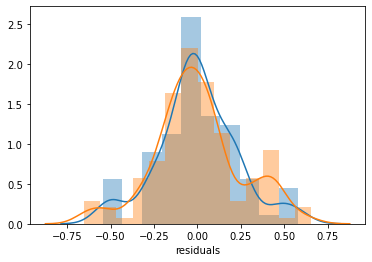

In [93]:
sns.distplot(X[X['D'] == 1].residuals)
sns.distplot(X[X['D'] == 0].residuals)

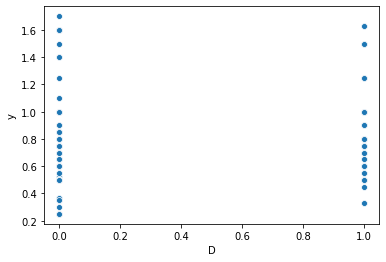

In [97]:
sns.scatterplot(x='D', y='y', data=data)

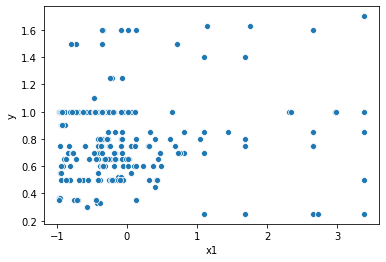

In [102]:
sns.scatterplot(x='x1', y='y', data=data)

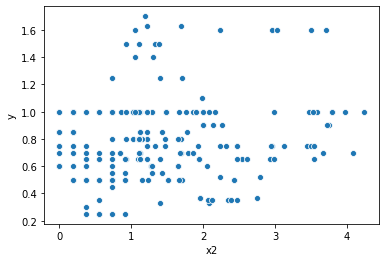

In [103]:
sns.scatterplot(x='x2', y='y', data=data)

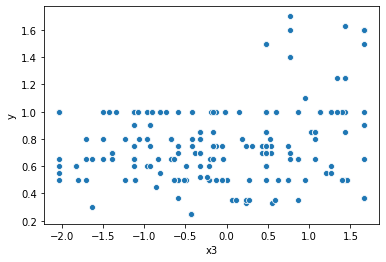

In [100]:
sns.scatterplot(x='x3', y='y', data=data)

This distribution could indicate heteroskedasticity

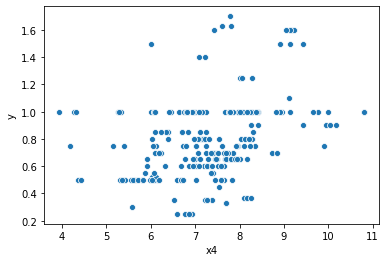

In [104]:
sns.scatterplot(x='x4', y='y', data=data)

In [107]:
#Robust standard errors (H1 covariance)
X = pd.get_dummies(data, columns=['industry'], prefix='ind_', drop_first=True)
X = X.drop(columns='y')
X = sm.add_constant(X)
model = sm.RLM(y,X)
results = model.fit()
print(results.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                      y   No. Observations:                  230
Model:                            RLM   Df Residuals:                      214
Method:                          IRLS   Df Model:                           15
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 06 Jul 2020                                         
Time:                        11:57:53                                         
No. Iterations:                    38                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0924      0.121     -0.760      0.4

In [111]:
#Robust standard errors (H2 covariance)
model = sm.RLM(y,X)
results = model.fit(cov='H2')
print(results.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                      y   No. Observations:                  230
Model:                            RLM   Df Residuals:                      214
Method:                          IRLS   Df Model:                           15
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H2                                         
Date:                Mon, 06 Jul 2020                                         
Time:                        12:02:53                                         
No. Iterations:                    38                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0924      0.111     -0.831      0.4

In [112]:
#Robust standard errors (H3 covariance)
model = sm.RLM(y,X)
results = model.fit(cov='H3')
print(results.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                      y   No. Observations:                  230
Model:                            RLM   Df Residuals:                      214
Method:                          IRLS   Df Model:                           15
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H3                                         
Date:                Mon, 06 Jul 2020                                         
Time:                        12:03:06                                         
No. Iterations:                    38                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0924      0.103     -0.900      0.3

In [108]:
#Standard errors clustered based on industry
model = sm.OLS(y,X)
results = model.fit(cov_type = 'cluster',
               cov_kwds = {'groups': data['industry']})
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     56.90
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           5.07e-07
Time:                        11:58:01   Log-Likelihood:                -1.5675
No. Observations:                 230   AIC:                             35.14
Df Residuals:                     214   BIC:                             90.14
Df Model:                          15                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1237      0.076     -1.637      0.1

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 15, but rank is 5
  'rank is %d' % (J, J_), ValueWarning)


The clustered standard errors for D are the highest and therefore the most conservative. Based on these standard errors the coefficient of D has a p-value of 0.117